# 0.) Import and Clean data

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("/Country-data.csv", sep = ",")

In [6]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [8]:
names = df[["country"]].copy()
X = df.drop("country", axis=1)

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)


# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

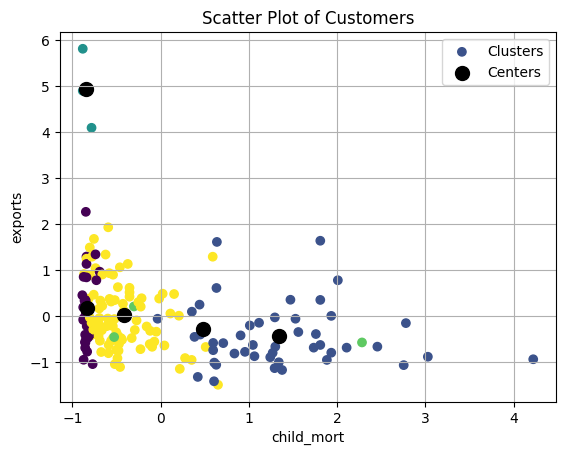

In [12]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [16]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)


In [18]:
# OPTIONAL DO IN 1 LINE OF CODE
WCSSs = [KMeans(n_clusters = k, n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]


# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

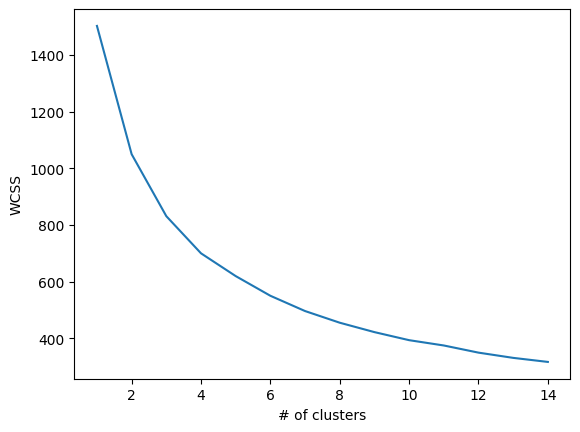

In [21]:
plt.plot(Ks,WCSSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSS")
plt.show()


# 6.) Do the same for a silhoutte plot

In [29]:
from sklearn.metrics import silhouette_score

In [35]:
SSs = []
Ks = range(2, 15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    sil = silhouette_score(X_scaled,kmeans.labels_)
    SSs.append(sil)

In [37]:
kmeans.labels_

array([ 7,  8,  2, 12,  4,  2,  2,  5,  5,  2,  8,  1,  2,  8,  4,  1,  4,
        7,  4,  2,  8, 10,  8, 11,  8,  7,  7,  4,  7,  5,  4,  7,  7,  8,
        2,  8,  0,  7, 12,  8,  7,  8,  1,  1,  5,  2,  8,  2,  8, 12,  0,
        1,  4,  5,  5,  0,  0,  8,  5,  0,  5,  4,  2,  7,  7,  4,  7,  1,
        5,  2,  2,  2,  0,  1,  5,  5,  4,  5,  4,  2,  0, 10, 11,  4,  0,
        8,  8, 10, 10,  4,  1,  9,  8,  0,  7,  1,  1,  7,  9, 12,  4, 10,
        8, 13,  8,  4,  7,  2, 10,  2,  5,  5,  7,  3,  5, 11,  0,  1,  4,
        2,  2,  8,  5,  6,  8,  2, 10,  4, 11,  0,  8,  1,  7,  9,  1,  1,
       10, 10,  1,  5,  2,  4,  0,  4,  5,  5,  0,  0,  4,  0,  7,  4,  4,
        8,  4,  7,  8, 11,  5,  5,  8,  2,  4, 13,  4,  0,  7],
      dtype=int32)

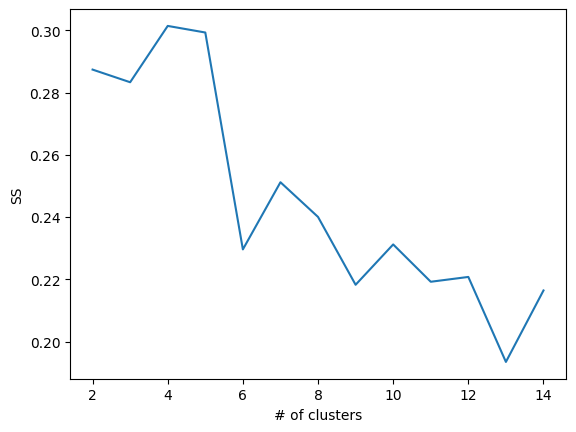

In [38]:
plt.plot(Ks,SSs)
plt.xlabel("# of clusters")
plt.ylabel("SS")
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [40]:
kmeans = KMeans(n_clusters = 2, n_init = 30).fit(X_scaled)

In [42]:
preds = pd.DataFrame(kmeans.labels_)

In [43]:
output = pd.concat([preds,df],axis =1)

In [52]:
print("Cluster 1:")
list(output.loc[output[0] ==  0, "country"])

Cluster 1:


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [53]:
print("Cluster 2:")
list(output.loc[output[0] ==  1, "country"])

Cluster 2:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [ ]:
#### Write an observation

# The first cluster includes countries with a wide range of economic and
# geographical characteristics, from highly developed nations such as the United
# States, United Kingdom, Japan, and Germany to developing countries like
# Albania, Iran, and Jamaica.

# The second cluster you started to list includes countries that, at a glance,
# seem to be primarily developing or underdeveloped nations with challenges in
# various socioeconomic areas.

#8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [58]:
output.drop("country",axis =1).groupby(0).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [57]:
output.drop("country",axis =1).groupby(0).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


In [ ]:
output.groupby(0).mean()


# 9.) Write an observation about the descriptive statistics.